### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
mentors = pd.read_csv("mentors.csv")

In [3]:
# Load aspirant profile from JSON
with open("aspirant_profile.json", "r") as f:
    aspirant_profile = json.load(f)


### Combine the Text Features

#### Creating a combined text feature for vectorization

In [4]:
mentors['combined_features'] = mentors['preferred_subjects'] + ' ' + \
                                mentors['target_colleges'] + ' ' + \
                                mentors['prep_level'] + ' ' + \
                                mentors['learning_style']

aspirant_combined = aspirant_profile['preferred_subjects'] + ' ' + \
                    aspirant_profile['target_colleges'] + ' ' + \
                    aspirant_profile['prep_level'] + ' ' + \
                    aspirant_profile['learning_style']


### TF-IDF Vectorization

In [5]:
vectorizer = TfidfVectorizer()
mentor_vectors = vectorizer.fit_transform(mentors['combined_features'])
aspirant_vector = vectorizer.transform([aspirant_combined])

### Calculate Similarity

In [6]:
similarity_scores = cosine_similarity(aspirant_vector, mentor_vectors).flatten()
mentors['similarity_score'] = similarity_scores


### Top 3 Mentor Recommendations

In [7]:
top_matches = mentors.sort_values(by='similarity_score', ascending=False).head(3).reset_index(drop=True)

### Visualization

/var/folders/hn/rj3y_kk55hx4x92393w2d2900000gn/T/ipykernel_24512/2232478224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='similarity_score', y='name', data=top_matches, palette='viridis')


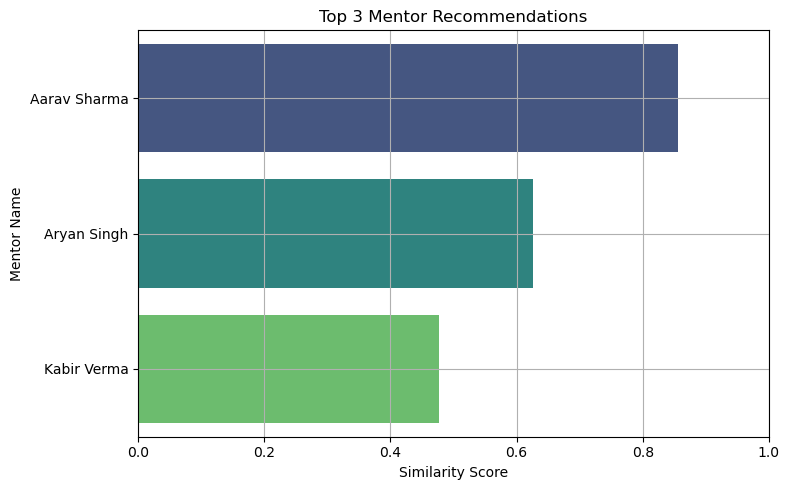

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='similarity_score', y='name', data=top_matches, palette='viridis')
plt.title('Top 3 Mentor Recommendations')
plt.xlabel('Similarity Score')
plt.ylabel('Mentor Name')
plt.xlim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

### Output Result

In [9]:
print("\n✅ Top 3 Recommended Mentors for the Aspirant:")
print(top_matches[['mentor_id', 'name', 'similarity_score']])


✅ Top 3 Recommended Mentors for the Aspirant:
  mentor_id          name  similarity_score
0      M101  Aarav Sharma          0.855251
1      M114   Aryan Singh          0.626107
2      M105   Kabir Verma          0.476956


### Reusable Function (Optional Extension)

In [10]:
def recommend_mentors(aspirant_profile, mentors_df):
    aspirant_combined = aspirant_profile['preferred_subjects'] + ' ' + \
                        aspirant_profile['target_colleges'] + ' ' + \
                        aspirant_profile['prep_level'] + ' ' + \
                        aspirant_profile['learning_style']

    mentors_df['combined_features'] = mentors_df['preferred_subjects'] + ' ' + \
                                      mentors_df['target_colleges'] + ' ' + \
                                      mentors_df['prep_level'] + ' ' + \
                                      mentors_df['learning_style']

    vectorizer = TfidfVectorizer()
    mentor_vectors = vectorizer.fit_transform(mentors_df['combined_features'])
    aspirant_vector = vectorizer.transform([aspirant_combined])

    similarity_scores = cosine_similarity(aspirant_vector, mentor_vectors).flatten()
    mentors_df['similarity_score'] = similarity_scores

    return mentors_df.sort_values(by='similarity_score', ascending=False).head(3)


### Batch Recommendation for Multiple Aspirants (Optional Advanced)



In [11]:
def batch_recommendation(aspirant_csv_path, mentors_df):
    aspirants_df = pd.read_csv(aspirant_csv_path)
    results = []

    for idx, row in aspirants_df.iterrows():
        profile = {
            'preferred_subjects': row['preferred_subjects'],
            'target_colleges': row['target_colleges'],
            'prep_level': row['prep_level'],
            'learning_style': row['learning_style']
        }
        top_mentors = recommend_mentors(profile, mentors_df.copy())
        for _, mentor in top_mentors.iterrows():
            results.append({
                'aspirant_id': row['aspirant_id'],
                'mentor_id': mentor['mentor_id'],
                'mentor_name': mentor['name'],
                'similarity_score': round(mentor['similarity_score'], 4)
            })

    return pd.DataFrame(results)